## `Data Understanding`

#### `Importing the necessary packages`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',250)
pd.set_option('display.max_columns',250)

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

#### `Reading the data`

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### `Shape of the dataframe`

In [3]:
telecom.shape

(99999, 226)

#### `Dataframe Information`

In [4]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# Function to Return Monthwise ColumnsList. Returns arrays of columns belonging to 6,7,8,9 month separately.
# Also returns an array of columns that are not month specific as common columns.
def returnColumnsByMonth(df):
    column_Month_6 = []
    column_Month_7 = []
    column_Month_8 = []
    column_Month_9 = []
    column_Common = []
    for eachColumns in df.columns:
        if((eachColumns.find("_6") >=0) | (eachColumns.find("jun_") >=0)):
            column_Month_6.append(eachColumns)
        elif((eachColumns.find("_7") >=0) | (eachColumns.find("jul_") >=0)):
            column_Month_7.append(eachColumns)
        elif((eachColumns.find("_8") >= 0) | (eachColumns.find("aug_") >=0)):
            column_Month_8.append(eachColumns)
        elif((eachColumns.find("_9") >=0) | (eachColumns.find("sep_") >=0)):
            column_Month_9.append(eachColumns)
        else:
            column_Common.append(eachColumns)
    return column_Month_6, column_Month_7, column_Month_8, column_Month_9, column_Common

In [6]:
column_Month_6, column_Month_7, column_Month_8, column_Month_9, column_Common = returnColumnsByMonth(telecom)

print("Month 6 Columns Count ==> {}".format(len(column_Month_6)))
print("Month 7 Columns Count ==> {}".format(len(column_Month_7)))
print("Month 8 Columns Count ==> {}".format(len(column_Month_8)))
print("Month 9 Columns Count ==> {}".format(len(column_Month_9)))
print("Common Columns Count ==> {}".format(len(column_Common)))

Month 6 Columns Count ==> 55
Month 7 Columns Count ==> 55
Month 8 Columns Count ==> 55
Month 9 Columns Count ==> 55
Common Columns Count ==> 6


## `Data Cleaning`

#### `Renaming columns`

In [7]:
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

### `Handling Missing Values`

In [8]:
# Calculating the missing value percentages for all the features

round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

<font color = 'red'> __Observations :__ </font>

`From the above observation, going by the percentage values, it seems that some of the features like 'count_reach','av_rech_amt_data','max_rech_data','total_rech_data','arpu','night_pck_user','fb_user' related variables, as part of a whole record, do not have any values i.e., missing values are present.`

`Let us analyse these features collectively for each month.`

In [9]:
# For June

telecom.loc[telecom['count_rech_2g_6'].isnull() & telecom['count_rech_3g_6'].isnull() & telecom['av_rech_amt_data_6'].isnull()
        & telecom['max_rech_data_6'].isnull() & telecom['total_rech_data_6'].isnull() & telecom['arpu_3g_6'].isnull() & 
        telecom['arpu_2g_6'].isnull() & telecom['night_pck_user_6'].isnull() & telecom['fb_user_6'].isnull(),
        ['count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6',
         'night_pck_user_6','fb_user_6']]

,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'red'> __Observations :__ </font>

`Individual missing value percentages for each of these features (ending with '_6') is 74.85% and collectively 74846 records have null values for these features. Hence, these are meaningful missing values.`

In [10]:
# For July

telecom.loc[telecom['count_rech_2g_7'].isnull() & telecom['count_rech_3g_7'].isnull() & telecom['av_rech_amt_data_7'].isnull()
        & telecom['max_rech_data_7'].isnull() & telecom['total_rech_data_7'].isnull() & telecom['arpu_3g_7'].isnull() & 
        telecom['arpu_2g_7'].isnull() & telecom['night_pck_user_7'].isnull() & telecom['fb_user_7'].isnull(),
        ['count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7','arpu_3g_7','arpu_2g_7',
         'night_pck_user_7','fb_user_7']]

,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'red'> __Observations :__ </font>

`Individual missing value percentages for each of these features (ending with '_7') is 74.43% and collectively 74428 records have null values for these features. Hence, these are meaningful missing values.`

In [11]:
# For August

telecom.loc[telecom['count_rech_2g_8'].isnull() & telecom['count_rech_3g_8'].isnull() & telecom['av_rech_amt_data_8'].isnull()
        & telecom['max_rech_data_8'].isnull() & telecom['total_rech_data_8'].isnull() & telecom['arpu_3g_8'].isnull() & 
        telecom['arpu_2g_8'].isnull() & telecom['night_pck_user_8'].isnull() & telecom['fb_user_8'].isnull(),
        ['count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8','arpu_3g_8','arpu_2g_8',
         'night_pck_user_8','fb_user_8']]

,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,max_rech_data_8,total_rech_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'red'> __Observations :__ </font>

`Individual missing value percentages for each of these features (ending with '_8') is 73.66% and collectively 73660 records have null values for these features. Hence, these are meaningful missing values.`

In [12]:
# For September

telecom.loc[telecom['count_rech_2g_9'].isnull() & telecom['count_rech_3g_9'].isnull() & telecom['av_rech_amt_data_9'].isnull()
        & telecom['max_rech_data_9'].isnull() & telecom['total_rech_data_9'].isnull() & telecom['arpu_3g_9'].isnull() & 
        telecom['arpu_2g_9'].isnull() & telecom['night_pck_user_9'].isnull() & telecom['fb_user_9'].isnull(),
        ['count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9','total_rech_data_9','arpu_3g_9','arpu_2g_9',
         'night_pck_user_9','fb_user_9']]

,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,max_rech_data_9,total_rech_data_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,fb_user_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'red'> __Observations :__ </font>

`Individual missing value percentages for each of these features (ending with '_9') is 74.08% and collectively 74077 records have null values for these features. Hence, these are meaningful missing values.`

`All these meaningful missing values can be imputed with 0s.`

`Among these features, features which are related to 'fb_user' and 'night_pck_user' are categorical variables, and commonly they have 2 values 0 and 1, where 1 represents that a customer has opted for schemes/services of Facebook/social media or night hours respectively.`

`Hence, for these also, meaningful missing values can be imputed with 0s.`

#### `Impute high % meaningful missing value with zeros`

In [13]:
# Declaring a variable to hold all the Zero Impute Columns

zero_impute = ['count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6',
               'count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7','arpu_3g_7','arpu_2g_7','night_pck_user_7','fb_user_7',
               'count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','fb_user_8',
               'count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9','total_rech_data_9','arpu_3g_9','arpu_2g_9','night_pck_user_9','fb_user_9',]

telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [14]:
# Let us now remove the columns - 'mobile_number', circle_id' (with one distinct value) and the 12 date columns

del_cols = ['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
          'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
          'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
          'date_of_last_rech_data_9']

telecom.drop(del_cols,axis=1,inplace=True)

telecom.shape


(99999, 212)

#### `Handling Missing Values for low %, with SimpleImputer Technique`

In [15]:
# Checking the percentage of missing values again

round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

std_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_t2c_mou_9      7.75
isd_og_mou_9          7.75
spl_og_mou_9          7.75
og_others_9           7.75
loc_ic_t2m_mou_9      7.75
loc_og_t2m_mou_9      7.75
ic_others_9           7.75
isd_ic_mou_9          7.75
spl_ic_mou_9          7.75
loc_ic_t2f_mou_9      7.75
std_ic_mou_9          7.75
std_ic_t2o_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_ic_t2m_mou_9      7.75
std_ic_t2t_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_ic_mou_9          7.75
onnet_mou_9           7.75
loc_og_t2t_mou_9      7.75
roam_og_mou_9         7.75
offnet_mou_9          7.75
roam_ic_mou_9         7.75
std_og_mou_8          5.38
loc_ic_t2t_mou_8      5.38
loc_ic_t2f_mou_8      5.38
std_og_t2f_mou_8      5.38
spl_ic_mou_8          5.38
std_og_t2c_mou_8      5.38
isd_ic_mou_8          5.38
ic_others_8           5.38
l

In [16]:
# Let us impute these mission values with an advanced imputational technique - SimpleImputer

impute = SimpleImputer()
tele = impute.fit_transform(telecom)
telecom_Imputed = pd.DataFrame(tele, columns=telecom.columns)

# Print the first few observations
telecom_Imputed.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229344,0.00,0.00,5

In [17]:
# Re-checking the percentage of missing values

round(100*(telecom_Imputed.isnull().sum()/len(telecom_Imputed.index)), 2).sort_values(ascending=False)

vbc_3g_9              0.0
total_og_mou_9        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
vbc_3g_6              0.0
loc_ic_t2t_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_9      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9

<font color ='red'> **Observations** : </font>

`Now our dataframe does not have any missing values.`

`Let us now identify the categorical and continuous features, by checking their unique distinct values.`

In [18]:
# Function to combine datatype and unique value counts of each column of dataframe, for easy visualization

def dtype_nunique(df_):
    df1=pd.DataFrame(df_.dtypes)
    df2=pd.DataFrame(df_.nunique().sort_values())
    df_combined=pd.merge(df1,df2,left_on=df1.index,right_on=df2.index,how='outer')
    df_combined.rename(columns={'key_0':'column_name','0_x':'datatype','0_y':'unique_values'}, inplace=True)
    df_combined.set_index('column_name', inplace=True)
    df_combined.sort_values(by='unique_values', inplace=True)
    return(df_combined)

In [19]:
df_combined = dtype_nunique(telecom_Imputed)
df_combined  #checking column datatypes, unique values before modification

,datatype,unique_values
column_name,,
loc_og_t2o_mou,float64,1
std_ic_t2o_mou_8,float64,1
std_ic_t2o_mou_9,float64,1
std_og_t2c_mou_9,float64,1
std_og_t2c_mou_8,float64,1
std_og_t2c_mou_7,float64,1
std_og_t2c_mou_6,float64,1
std_ic_t2o_mou_7,float64,1
std_ic_t2o_mou_6,float64,1


#### `Dropping the Low Varience Variables`

In [20]:
# Let us drop those columns having low variance

low_varnc_cols = []
for col in telecom_Imputed.columns:
    if telecom_Imputed[col].nunique() == 1:
        low_varnc_cols.append(col)
print("Columns that have low variance and can be removed are : {0}".format(low_varnc_cols))
telecom_Imputed.drop(low_varnc_cols, axis=1, inplace=True)
telecom_Imputed.shape

Columns that have low variance and can be removed are : ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


(99999, 201)

In [21]:
column_Month_6, column_Month_7, column_Month_8, column_Month_9, column_Common = returnColumnsByMonth(telecom_Imputed)

print("Month 6 Columns Count ==> {}".format(len(column_Month_6)))
print("Month 7 Columns Count ==> {}".format(len(column_Month_7)))
print("Month 8 Columns Count ==> {}".format(len(column_Month_8)))
print("Month 9 Columns Count ==> {}".format(len(column_Month_9)))
print("Common Columns Count ==> {}".format(len(column_Common)))

Month 6 Columns Count ==> 50
Month 7 Columns Count ==> 50
Month 8 Columns Count ==> 50
Month 9 Columns Count ==> 50
Common Columns Count ==> 1


### `Filter high-value customers`

`Need to predict churn only for the high-value customers.`

#### `Define high-value customers:`

`Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).`

`We need the below features to define the high-value customers, as per the given definition, in the problem statement, for the good phase (first 2 months):-`

    - count_rech_2g_6
    - count_rech_3g_6
    - av_rech_amt_data_6
    - total_rech_amt_6
    - count_rech_2g_7
    - count_rech_3g_7
    - av_rech_amt_data_7
    - total_rech_amt_7

#### `Calculations to identify the High-Value Customers`

In [22]:
# Creating a new feature to calculate the total number of data related recharges

telecom_Imputed['total_num_data_rech_6'] = (telecom_Imputed['count_rech_2g_6'] + telecom_Imputed['count_rech_3g_6']).astype('int')
telecom_Imputed['total_num_data_rech_7'] = (telecom_Imputed['count_rech_2g_7'] + telecom_Imputed['count_rech_3g_7']).astype('int')
telecom_Imputed['total_num_data_rech_8'] = (telecom_Imputed['count_rech_2g_8'] + telecom_Imputed['count_rech_3g_8']).astype('int')


# Creating a new feature to calculate the total amount of data related recharges

telecom_Imputed['total_rech_amt_data_6'] = telecom_Imputed['total_num_data_rech_6'] * telecom_Imputed['av_rech_amt_data_6']
telecom_Imputed['total_rech_amt_data_7'] = telecom_Imputed['total_num_data_rech_7'] * telecom_Imputed['av_rech_amt_data_7']
telecom_Imputed['total_rech_amt_data_8'] = telecom_Imputed['total_num_data_rech_8'] * telecom_Imputed['av_rech_amt_data_8']


# Creating a new feature to calculate the total monthly recharge amounts

telecom_Imputed['total_monthly_rech_amt_6'] = telecom_Imputed['total_rech_amt_data_6'] + telecom_Imputed['total_rech_amt_6']
telecom_Imputed['total_monthly_rech_amt_7'] = telecom_Imputed['total_rech_amt_data_7'] + telecom_Imputed['total_rech_amt_7']
telecom_Imputed['total_monthly_rech_amt_8'] = telecom_Imputed['total_rech_amt_data_8'] + telecom_Imputed['total_rech_amt_8']

In [23]:
# Extracting only the High-Value Customers into a new dataframe, where the recharge amount is more than or equal to 
# the 70th percentile of the average monthly recharge amounts done in these 2 months

telecom_HVC = telecom_Imputed[telecom_Imputed[['total_monthly_rech_amt_6','total_monthly_rech_amt_7']].mean(axis=1) >= 
                              telecom_Imputed[['total_monthly_rech_amt_6','total_monthly_rech_amt_7']].mean(axis=1).quantile(0.7)]

telecom_HVC.shape

(30001, 210)

In [24]:
col_drop = ['total_num_data_rech_6','total_num_data_rech_7','total_num_data_rech_8',
            'total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8',
            'total_monthly_rech_amt_6','total_monthly_rech_amt_7','total_monthly_rech_amt_8']
telecom_HVC.drop(col_drop,axis=1,inplace=True)
telecom_HVC.shape

(30001, 201)

In [25]:
# # Dropping the columns 'total_num_data_rech_','av_rech_amt_data_','count_rech_2g_','count_rech_3g_','total_rech_amt_data_' 
# # and 'total_rech_amt_', for first 3 months, since the new feature - 'total_monthly_rech_amt' will take care of these

# col_drop = ['count_rech_2g_6','count_rech_3g_6','total_num_data_rech_6','av_rech_amt_data_6','total_rech_amt_data_6','total_rech_amt_6',
#            'count_rech_2g_7','count_rech_3g_7','total_num_data_rech_7','av_rech_amt_data_7','total_rech_amt_data_7','total_rech_amt_7',
#            'count_rech_2g_8','count_rech_3g_8','total_num_data_rech_8','av_rech_amt_data_8','total_rech_amt_data_8','total_rech_amt_8']

# telecom_HVC.drop(col_drop,axis=1,inplace=True)
# telecom_HVC.shape

### **`Derive Churn`**

#### `Tag churners and remove attributes of the churn phase`

`Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:`

    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

`After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).`

In [26]:
# `Calculate Total Incoming and Outgoing Minutes of Usage`

telecom_HVC['total_calls_mou_9'] = telecom_HVC['total_ic_mou_9'] + telecom_HVC['total_og_mou_9']

# `Calculate 2g and 3g Data consumption`

telecom_HVC['total_internet_mou_9'] = telecom_HVC['vol_2g_mb_9'] + telecom_HVC['vol_3g_mb_9']

In [27]:
# `Create churn variable those who have not used either calls or internet in the month of 
# September are customers who have churned.`

telecom_HVC['churn'] = telecom_HVC.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and 
                                                         x.total_internet_mou_9 == 0) else 0, axis=1)

In [28]:
telecom_HVC[['total_calls_mou_9','total_internet_mou_9','churn']].head()

,total_calls_mou_9,total_internet_mou_9,churn
0,0.00,0.00,1
7,0.00,0.00,1
8,177.09,0.00,0
21,1284.14,0.00,0
23,255.11,328.67,0


#### `Churn Percentage`

In [29]:
# Checking the balancing nature of the churned customers

telecom_HVC['churn'].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

<font color ='red'> __Observations :__ </font>


**`From the distribution of churn vs non-churn customers above. Churn is 8.13% which indicates an unbalanced datasets.`**

#### `Delete Columns that belong to the Churn Months and 9th Month Columns`

In [30]:
telecom_HVC = telecom_HVC.drop(columns=['total_calls_mou_9','total_internet_mou_9'], axis=1)

In [31]:
# Now the 9th month columns need to be dropped because we would predict churn/non-churn based on data from the 1st 3 months

cols_to_drop = [col for col in telecom_HVC.columns if '_9' in col]
print(cols_to_drop)

telecom_HVC.drop(cols_to_drop, axis=1, inplace=True)

telecom_HVC.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


(30001, 152)

## `EDA and Derive Columns`

#### `Outlier Analysis`

In [32]:
# Lets look at distribution of amount columns

for col in telecom_HVC.filter(regex="amt").columns:
    print(telecom_HVC[col].describe(percentiles=[.25, .5, .75, .90, .95, .99]))
    print("\n")

count    30001.000000
mean       660.732342
std        561.032865
min          0.000000
25%        360.000000
50%        566.000000
75%        834.000000
90%       1181.000000
95%       1480.000000
99%       2376.000000
max      35190.000000
Name: total_rech_amt_6, dtype: float64


count    30001.000000
mean       660.498017
std        582.430876
min          0.000000
25%        352.000000
50%        562.000000
75%        831.000000
90%       1194.000000
95%       1510.000000
99%       2427.000000
max      40335.000000
Name: total_rech_amt_7, dtype: float64


count    30001.000000
mean       584.365454
std        611.245907
min          0.000000
25%        250.000000
50%        490.000000
75%        776.000000
90%       1148.000000
95%       1490.000000
99%       2341.000000
max      45320.000000
Name: total_rech_amt_8, dtype: float64


count    30001.000000
mean       169.284824
std        175.315958
min          0.000000
25%        110.000000
50%        120.000000
75%        200.0000

<font color='red'> __Observations :__ </font>

`Huge differences are observed between 99% and max values for all the continuous features.`

In [33]:
# Capping the outliers at the 99th percentile

for col in telecom_HVC.filter(regex="amt").columns:
    cap = telecom_HVC[col].quantile(0.99)
    cond = telecom_HVC[col] > cap
    telecom_HVC.loc[cond,col] = cap

In [34]:
# Re-checking the distribution of the amount columns

for col in telecom_HVC.filter(regex="amt").columns:
    print(telecom_HVC[col].describe(percentiles=[.25, .5, .75, .90, .95, .99]))
    print("\n")

count    30001.000000
mean       648.394954
std        431.957166
min          0.000000
25%        360.000000
50%        566.000000
75%        834.000000
90%       1181.000000
95%       1480.000000
99%       2376.000000
max       2376.000000
Name: total_rech_amt_6, dtype: float64


count    30001.000000
mean       648.419986
std        442.054934
min          0.000000
25%        352.000000
50%        562.000000
75%        831.000000
90%       1194.000000
95%       1510.000000
99%       2427.000000
max       2427.000000
Name: total_rech_amt_7, dtype: float64


count    30001.000000
mean       571.447185
std        460.132574
min          0.000000
25%        250.000000
50%        490.000000
75%        776.000000
90%       1148.000000
95%       1490.000000
99%       2341.000000
max       2341.000000
Name: total_rech_amt_8, dtype: float64


count    30001.000000
mean       166.714843
std        152.024790
min          0.000000
25%        110.000000
50%        120.000000
75%        200.0000

#### `Deriving new features`

    1) tenure_yr
    2) vol_data_mb
    3) _avg_6_7

`'AON' is age on network in days i.e., the tenure of customer in days. A new feature 'Tenure' can be derived in terms of years.`

In [35]:
telecom_HVC['tenure'] = telecom_HVC['aon']/365

In [36]:
# Let us analyse the data for the new feature

telecom_HVC['tenure'].describe()

count    30001.000000
mean         3.313339
std          2.623775
min          0.493151
25%          1.260274
50%          2.317808
75%          4.810959
max         11.838356
Name: tenure, dtype: float64

In [37]:
# Let us bin the new feature for our convinience

range = [0,1,2,3,5,5.01]
label = [ '0-1 Yr', '1-2 Yrs', '2-3 Yrs','3-5 Yrs', '5 Yrs and above']
telecom_HVC['tenure_yr'] = pd.cut(telecom_HVC['tenure'], range, labels=label)
telecom_HVC['tenure_yr'].value_counts(normalize=True)*100

1-2 Yrs            34.990138
0-1 Yr             23.173351
3-5 Yrs            21.459566
2-3 Yrs            20.315582
5 Yrs and above     0.061363
Name: tenure_yr, dtype: float64

In [38]:
# Let us drop the features - 'aon' and 'tenure'

telecom_HVC.drop(['aon','tenure'],axis=1,inplace=True)

`The next new feature 'vol_data_mb' for each month will be the summation of the usage of 2g and 3g in that month.`

In [39]:
telecom_HVC['vol_data_mb_6'] = (telecom_HVC['vol_2g_mb_6'] + telecom_HVC['vol_3g_mb_6']).astype('int')
telecom_HVC['vol_data_mb_7'] = (telecom_HVC['vol_2g_mb_7'] + telecom_HVC['vol_3g_mb_7']).astype('int')
telecom_HVC['vol_data_mb_8'] = (telecom_HVC['vol_2g_mb_8'] + telecom_HVC['vol_3g_mb_8']).astype('int')

In [40]:
# Dropping the original features

telecom_HVC.drop(['vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8'],axis=1,inplace=True)
telecom_HVC.shape

(30001, 149)

`June and July, i.e., the months 6 and 7, are the good phase, hence the data for both can be clubbed together, and can be considered holistically.`

In [41]:
# Renaming the columns 'fb_user_' and 'night_pck_user_' for months 6,7,8 ; since these are categorical columns 
# and cannot be clubbed

telecom_HVC.rename(columns = {'fb_user_6':'fb_user_June', 'fb_user_7':'fb_user_July', 'fb_user_8':'fb_user_August'}, 
                         inplace = True) 

telecom_HVC.rename(columns = {'night_pck_user_6':'night_pck_user_June', 'night_pck_user_7':'night_pck_user_July', 
                                    'night_pck_user_8':'night_pck_user_August'}, 
                         inplace = True)

In [42]:
# Let us fetch the list of columns belonging to 6th and 7th months
col_list_6_7 = telecom_HVC.filter(regex='_6|_7').columns.str[:-2]
col_list_6_7.unique()

# Calculating the average of the corresponding values for 6th and 7th month

for idx, col in enumerate(col_list_6_7.unique()):
    avg_col_name = "avg_"+col+"_mnth67" 
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_HVC[avg_col_name] = (telecom_HVC[col_6]  + telecom_HVC[col_7])/ 2
    
telecom_HVC.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_June,night_pck_user_July,night_pck_user_August,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_June,fb_user_July,fb_user_August,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,tenure_yr,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_arpu_mnth67,avg_onnet_mou_mnth67,avg_offnet_mou_mnth67,avg_roam_ic_mou_mnth67,avg_roam_og_mou_mnth67,avg_loc_og_t2t_mou_mnth67,avg_loc_og_t2m_mou_mnth67,avg_loc_og_t2f_mou_mnth67,avg_loc_og_t2c_mou_mnth67,avg_loc_og_mou_mnth67,avg_std_og_t2t_mou_mnth67,avg_std_og_t2m_mou_mnth67,avg_std_og_t2f_mou_mnth67,avg_std_og_mou_mnth67,avg_isd_og_mou_mnth67,avg_spl_og_mou_mnth67,avg_og_others_mnth67,avg_total_og_mou_mnth67,avg_loc_ic_t2t_mou_mnth67,avg_loc_ic_t2m_mou_mnth67,avg_loc_ic_t2f_mou_mnth67,avg_loc_ic_mou_mnth67,avg_std_ic_t2t_mou_mnth67,avg_std_ic_t2m_mou_mnth67,avg_std_ic_t2f_mou_mnth67,avg_std_ic_mou_mnth67,avg_total_ic_mou_mnth67,avg_spl_ic_mou_mnth67,avg_isd_ic_mou_mnth67,avg_ic_others_mnth67,avg_total_rech_num_mnth67,avg_total_rech_amt_mnth67,avg_max_rech_amt_mnth67,avg_last_day_rch_amt_mnth67,avg_total_rech_data_mnth67,avg_max_rech_data_mnth67,avg_count_rech_2g_mnth67,avg_count_rech_3g_mnth67,avg_av_rech_amt_data_mnth67,avg_arpu_3g_mnth67,avg_arpu_2g_mnth67,avg_monthly_2g_mnth67,avg_sachet_2g_mnth67,avg_monthly_3g_mnth67,avg_sachet_3g_mnth67,avg_vbc_3g_mnth67,avg_vol_data_mb_mnth67
0,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4.0,3.0,2.

In [43]:
telecom_HVC.shape

(30001, 196)

In [44]:
# Now let us drop the individual columns for 6th and 7th months

col_to_drop_6_7 = telecom_HVC.filter(regex='_6|_7').columns
telecom_HVC.drop(col_to_drop_6_7, axis=1, inplace=True)

telecom_HVC.shape

(30001, 102)

`Let us now identify the categorical and continuous features.`

In [45]:
# Function to combine datatype and unique value counts of each column of dataframe.

def dtype_nunique(df_):
    df1=pd.DataFrame(df_.dtypes)
    df2=pd.DataFrame(df_.nunique().sort_values())
    df_combined=pd.merge(df1,df2,left_on=df1.index,right_on=df2.index,how='outer')
    df_combined.rename(columns={'key_0':'column_name','0_x':'datatype','0_y':'unique_values'}, inplace=True)
    df_combined.set_index('column_name', inplace=True)
    df_combined.sort_values(by='unique_values', inplace=True)
    return(df_combined)

In [46]:
df_combined = dtype_nunique(telecom_HVC)
df_combined  #checking column datatypes, unique values before modification

,datatype,unique_values
column_name,,
fb_user_August,float64,2
night_pck_user_June,float64,2
night_pck_user_July,float64,2
churn,int64,2
fb_user_July,float64,2
night_pck_user_August,float64,2
fb_user_June,float64,2
tenure_yr,category,5
monthly_2g_8,float64,6


In [47]:
# Changing the datatypes of the features accordingly

telecom_HVC['churn'] = telecom_HVC['churn'].astype('category')

telecom_HVC['fb_user_June'] = telecom_HVC['fb_user_June'].astype('object')
telecom_HVC['fb_user_July'] = telecom_HVC['fb_user_July'].astype('object')
telecom_HVC['fb_user_August'] = telecom_HVC['fb_user_August'].astype('object')

telecom_HVC['night_pck_user_June'] = telecom_HVC['night_pck_user_June'].astype('object')
telecom_HVC['night_pck_user_July'] = telecom_HVC['night_pck_user_July'].astype('object')
telecom_HVC['night_pck_user_August'] = telecom_HVC['night_pck_user_August'].astype('object')

telecom_HVC['tenure_yr'] = telecom_HVC['tenure_yr'].astype('object')

telecom_HVC['avg_monthly_2g_mnth67'] = telecom_HVC['avg_monthly_2g_mnth67'].astype('object')
telecom_HVC['avg_monthly_3g_mnth67'] = telecom_HVC['avg_monthly_3g_mnth67'].astype('object')
telecom_HVC['monthly_2g_8'] = telecom_HVC['monthly_2g_8'].astype('object')
telecom_HVC['monthly_3g_8'] = telecom_HVC['monthly_3g_8'].astype('object')

#### `Analysis of the features with respect to 'churn'`

In [48]:
# Dividing the dataset w.r.t. churn or non-churn customers

churn = telecom_HVC[telecom_HVC['churn']==1]
unconv = telecom_HVC[telecom_HVC['churn']==0]

In [49]:
def plot_bar(column_name, title_name, df1=telecom_HVC, df2=churn, figsize=(7,4), kind='bar', normalize_df_appl=False, k=1):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    (df1[column_name].value_counts(normalize=normalize_df_appl)*k).plot(kind=kind)
    plt.title('Total Churn by {0}'.format(title_name), fontsize=12)
    
    plt.subplot(1,2,2)
    (df2[column_name].value_counts(normalize=True)*100).plot(kind=kind)
    plt.title('Churn by {0} (%)'.format(title_name), fontsize=12)
    
    plt.show()

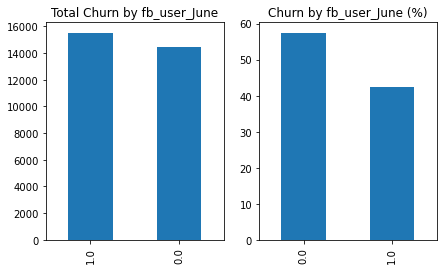

In [50]:
# Analysis for 'fb_user_June'

plot_bar('fb_user_June','fb_user_June')

<font color='red'> __Observations :__ </font>

`Those customers who have opt for services of Facebook and other similar social networking sites, for the month of June, are less likely to churn.`

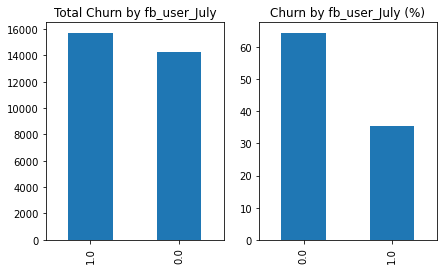

In [51]:
# Analysis for 'fb_user_July'

plot_bar('fb_user_July','fb_user_July')

<font color='red'> __Observation :__</font>

`Those customers who have opt for services of Facebook and other similar social networking sites, for the month of July, are less likely to churn.`

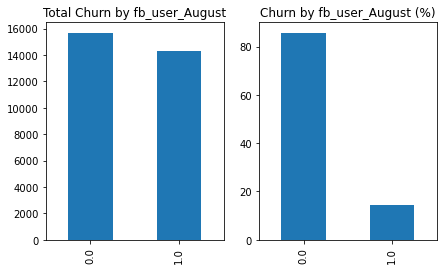

In [52]:
# Analysis for 'fb_user_August'

plot_bar('fb_user_August','fb_user_August')

<font color='red'> __Observation :__</font>

`Those customers who have opt for services of Facebook and other similar social networking sites, for the month of August, are very less likely to churn.`

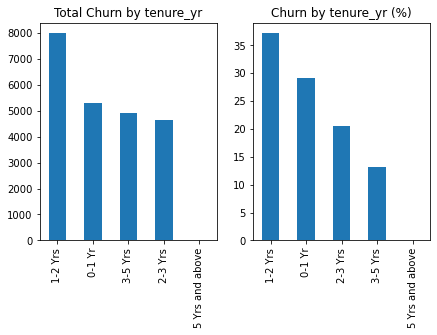

In [53]:
# Analysis for 'tenure_yr'

plot_bar('tenure_yr','tenure_yr')

<font color='red'> __Observation :__</font>

`Customers, those who are on this network for less than a year, are more likely to churn.`

In [54]:
# Defining function for continuous variable univariate analysis using disribution plot
def plot_distplot(column_name, title_name):
    plt.figure(figsize=(15,5))
    plt.title('{0} - All customers vs Churn'.format(title_name), fontsize=12)
    sns.distplot(telecom_HVC[column_name],hist=False,label='All')
    sns.distplot(churn[column_name],hist=False,label='Churn')
    plt.show()

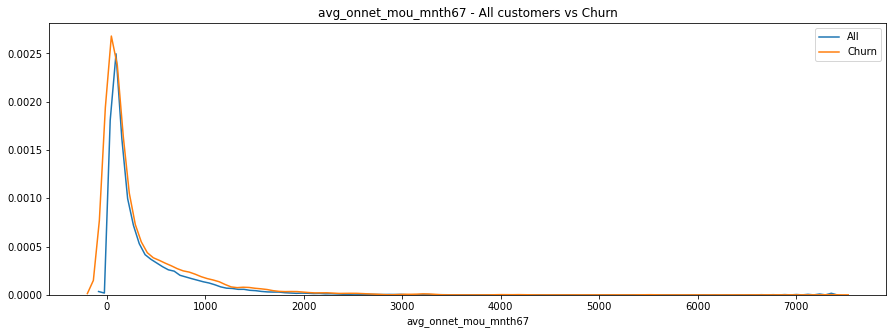

In [55]:
# Univariate Analysis for 'avg_onnet_mou_mnth67'
plot_distplot('avg_onnet_mou_mnth67','avg_onnet_mou_mnth67')

<font color='red'> __Observation :__</font>

`Those customers, who have used around 1200 or less minutes, over call, within the same metwork, during the good phase, are more likely to churn.`

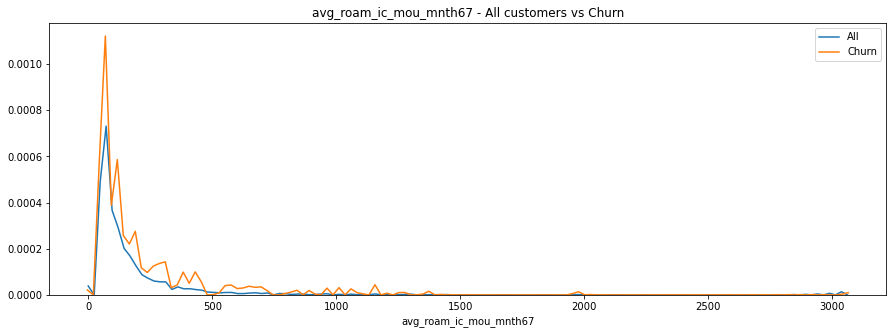

In [56]:
# Univariate Analysis for 'avg_roam_ic_mou_mnth67'
plot_distplot('avg_roam_ic_mou_mnth67','avg_roam_ic_mou_mnth67')

<font color='red'> __Observation :__</font>

`Those customers, who have used around 500 or less minutes, over incoming roaming call, during the good phase, are more likely to churn.`

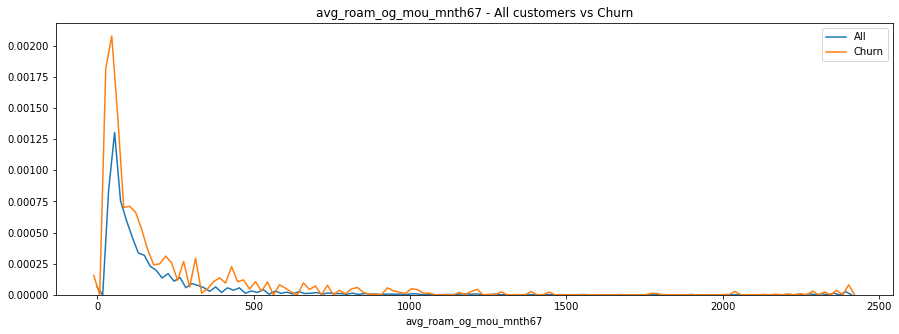

In [57]:
# Univariate Analysis for 'avg_roam_og_mou_mnth67'
plot_distplot('avg_roam_og_mou_mnth67','avg_roam_og_mou_mnth67')

<font color='red'> __Observation :__</font>

`Those customers, who have used very less minutes, over outgoing roaming call, during the good phase, are more likely to churn.`

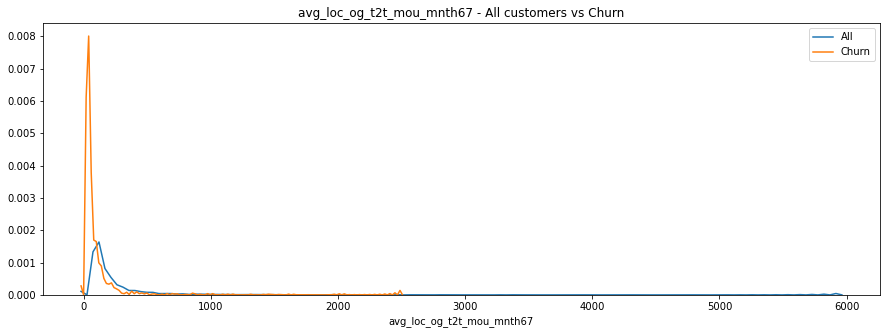

In [58]:
# Univariate Analysis for 'avg_loc_og_t2t_mou_mnth67'
plot_distplot('avg_loc_og_t2t_mou_mnth67','avg_loc_og_t2t_mou_mnth67')

<font color='red'> __Observation :__</font>

`Those customers, who have used very less minutes, over local outgoing call, within the same network, during the good phase, are more likely to churn.`

#### `Creating Dummy Variables`

In [59]:
dummy1 = pd.get_dummies(telecom_HVC['tenure_yr'],drop_first=True,prefix='tenure')
telecom_HVC = pd.concat([telecom_HVC,dummy1], axis=1)
telecom_HVC = telecom_HVC.drop(['tenure_yr'],1)

dummy2 = pd.get_dummies(telecom_HVC['night_pck_user_June'],drop_first=True,prefix='night_pck_user_June')
telecom_HVC = pd.concat([telecom_HVC,dummy2], axis=1)
telecom_HVC = telecom_HVC.drop(['night_pck_user_June'],1)

dummy3 = pd.get_dummies(telecom_HVC['night_pck_user_July'],drop_first=True,prefix='night_pck_user_July')
telecom_HVC = pd.concat([telecom_HVC,dummy3], axis=1)
telecom_HVC = telecom_HVC.drop(['night_pck_user_July'],1)

dummy4 = pd.get_dummies(telecom_HVC['night_pck_user_August'],drop_first=True,prefix='night_pck_user_August')
telecom_HVC = pd.concat([telecom_HVC,dummy4], axis=1)
telecom_HVC = telecom_HVC.drop(['night_pck_user_August'],1)

dummy5 = pd.get_dummies(telecom_HVC['monthly_2g_8'],drop_first=True,prefix='monthly_2g_8')
telecom_HVC = pd.concat([telecom_HVC,dummy5], axis=1)
telecom_HVC = telecom_HVC.drop(['monthly_2g_8'],1)

dummy6 = pd.get_dummies(telecom_HVC['monthly_3g_8'],drop_first=True,prefix='monthly_3g_8')
telecom_HVC = pd.concat([telecom_HVC,dummy6], axis=1)
telecom_HVC = telecom_HVC.drop(['monthly_3g_8'],1)

dummy7 = pd.get_dummies(telecom_HVC['fb_user_June'],drop_first=True,prefix='fb_user_June')
telecom_HVC = pd.concat([telecom_HVC,dummy7], axis=1)
telecom_HVC = telecom_HVC.drop(['fb_user_June'],1)

dummy8 = pd.get_dummies(telecom_HVC['fb_user_July'],drop_first=True,prefix='fb_user_July')
telecom_HVC = pd.concat([telecom_HVC,dummy8], axis=1)
telecom_HVC = telecom_HVC.drop(['fb_user_July'],1)

dummy9 = pd.get_dummies(telecom_HVC['fb_user_August'],drop_first=True,prefix='fb_user_August')
telecom_HVC = pd.concat([telecom_HVC,dummy9], axis=1)
telecom_HVC = telecom_HVC.drop(['fb_user_August'],1)

dummy10 = pd.get_dummies(telecom_HVC['avg_monthly_2g_mnth67'],drop_first=True,prefix='avg_monthly_2g_mnth67')
telecom_HVC = pd.concat([telecom_HVC,dummy10], axis=1)
telecom_HVC = telecom_HVC.drop(['avg_monthly_2g_mnth67'],1)

dummy11 = pd.get_dummies(telecom_HVC['avg_monthly_3g_mnth67'],drop_first=True,prefix='avg_monthly_3g_mnth67')
telecom_HVC = pd.concat([telecom_HVC,dummy11], axis=1)
telecom_HVC = telecom_HVC.drop(['avg_monthly_3g_mnth67'],1)

telecom_HVC.shape

(30001, 144)

In [60]:
telecom_HVC.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 144 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   arpu_8                       float64 
 1   onnet_mou_8                  float64 
 2   offnet_mou_8                 float64 
 3   roam_ic_mou_8                float64 
 4   roam_og_mou_8                float64 
 5   loc_og_t2t_mou_8             float64 
 6   loc_og_t2m_mou_8             float64 
 7   loc_og_t2f_mou_8             float64 
 8   loc_og_t2c_mou_8             float64 
 9   loc_og_mou_8                 float64 
 10  std_og_t2t_mou_8             float64 
 11  std_og_t2m_mou_8             float64 
 12  std_og_t2f_mou_8             float64 
 13  std_og_mou_8                 float64 
 14  isd_og_mou_8                 float64 
 15  spl_og_mou_8                 float64 
 16  og_others_8                  float64 
 17  total_og_mou_8               float64 
 18  loc_ic_t2t_mou_8         

## `Data Preparation`

In [61]:
# To seperate out the continuous features

cols_scaling = telecom_HVC.select_dtypes(exclude=['object','category','uint8']).columns

len(cols_scaling)

90

#### `Test-Train Split`

In [62]:
y = telecom_HVC.pop('churn')
X = telecom_HVC

# Splitting the Data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=14)

print('#X-Train Shape : ', X_train.shape)
print('#X-Test Shape : ', X_test.shape)
print('#y-Train Shape : ', y_train.shape)
print('#y-Test Shape : ', y_test.shape)

#X-Train Shape :  (21000, 143)
#X-Test Shape :  (9001, 143)
#y-Train Shape :  (21000,)
#y-Test Shape :  (9001,)


#### `Feature Scaling`

In [63]:
scaler = StandardScaler()

# fitting and transforming train set
# Apply scaler() to all the columns as selected above in cols_scaling

X_train[cols_scaling] = scaler.fit_transform(X_train[cols_scaling])


In [64]:
# Fit and transform operations are done on the training data but only transform operation will be done on the test data

X_test[cols_scaling] = scaler.transform(X_test[cols_scaling])

In [65]:
# Creating 2 seperate X-train and X-test sets for Logistic Regression RFE/VIF operation purposes

X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

In [66]:
logreg = LogisticRegression(class_weight='balanced')
rfe = RFE(logreg, 50)             # RFE with 50 features
rfe = rfe.fit(X_train_lr, y_train)

In [67]:
col_rfe = X_train_lr.columns[rfe.support_]
col_rfe

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'avg_loc_og_t2t_mou_mnth67', 'avg_loc_og_mou_mnth67',
       'avg_loc_ic_t2m_mou_mnth67', 'avg_loc_ic_mou_mnth67',
       'avg_std_ic_mou_mnth67', 'avg_total_ic_mou_mnth67',
       'avg_isd_ic_mou_mnth67', 'avg_total_rech_amt_mnth67',
       'avg_total_rech_data_mnth67', 'avg_sachet_2g_mnth67',
       'avg_sachet_3g_mnth67', 'tenure_3-5 Yrs', 'tenure_5 Yrs and above',
       'night_pck_user_June_1.0', 'night_pck_user_August_1.0',
       'monthly_2g_8_1.0', 'monthly_2g_8_2.0', 'monthly_3g_8_1.0',
       'monthly_3g_8_3.0', 'monthly_3g_8_4.0', 'monthly_3g_8_5.0',
       'fb_user_August_1.0', 'avg_monthly_2g_mnth67_1.5',
       'avg_monthly_2

In [68]:
X_train_1 = X_train_lr[col_rfe]
X_train_1 = sm.add_constant(X_train_1)
lgm = sm.GLM(y_train,X_train_1,family = sm.families.Binomial()).fit()

In [69]:
X_train_1_ = X_train_1.drop(['const'], axis=1)

In [70]:
def calculate_vif_(X, thresh=5.0):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
            dropped=False
            c = X[cols[variables]].values
            vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
                variables = np.delete(variables, maxloc)
                dropped=True

    print('Remaining variables:')
    print(X.columns[variables])

In [71]:
calculate_vif_(X_train_1_,5.0)

dropping 'avg_total_ic_mou_mnth67' at index: 22
dropping 'loc_ic_mou_8' at index: 7
dropping 'total_ic_mou_8' at index: 8
dropping 'avg_total_rech_data_mnth67' at index: 22
dropping 'total_og_mou_8' at index: 4
dropping 'avg_loc_ic_mou_mnth67' at index: 17
dropping 'av_rech_amt_data_8' at index: 13
Remaining variables:
Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_8', 'avg_loc_og_t2t_mou_mnth67',
       'avg_loc_og_mou_mnth67', 'avg_loc_ic_t2m_mou_mnth67',
       'avg_std_ic_mou_mnth67', 'avg_isd_ic_mou_mnth67',
       'avg_total_rech_amt_mnth67', 'avg_sachet_2g_mnth67',
       'avg_sachet_3g_mnth67', 'tenure_3-5 Yrs', 'tenure_5 Yrs and above',
       'night_pck_user_June_1.0', 'night_pck_user_August_1.0',
       'monthly_2g_8_1.0', 'monthly_2g_8_2.0', 'monthly_3g_8_1.0',
  

In [72]:
X_train_1_.drop(['avg_total_ic_mou_mnth67','loc_ic_mou_8','total_ic_mou_8','avg_total_rech_data_mnth67','total_og_mou_8',
                'avg_loc_ic_mou_mnth67','av_rech_amt_data_8'],axis=1,inplace=True)
X_train_1_.shape

(21000, 43)

In [73]:
lr = logreg.fit(X_train_1_,y_train)

y_train_pred = lr.predict_proba(X_train_1_)

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred[:,1]})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,churn,churn_prob,ID
0,0,0.821159,81513
1,0,0.063391,20009
2,0,0.683780,11115
3,0,0.144905,38429
4,0,0.289291,30435


In [74]:
# Creating new column 'churn_pred' with 1 if churn_prob > 0.5 else 0

y_train_pred_final['churn_pred'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,ID,churn_pred
0,0,0.821159,81513,1
1,0,0.063391,20009,0
2,0,0.683780,11115,1
3,0,0.144905,38429,0
4,0,0.289291,30435,0


#### `Confusion Matrix for train set`

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['churn_pred'])
print(confusion)

[[14874  4415]
 [  303  1408]]


#### `Accuracy for Train Model`

In [76]:
accuracy = metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['churn_pred'])
print('Accuracy on Train Data : ', round(100*accuracy,2),'%')

Accuracy on Train Data :  77.53 %


#### `Metrics beyond simple accuracy`

In [77]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
sensitivity = TP/(FN + TP)
specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*sensitivity,2),'%')
print('Specificity : ',  round(100*specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  82.29 %
Specificity :  77.11 %
False Positive Rate :  22.89 %
Positive Predictive Power :  24.18 %
Negative Predictive Power :  98.0 %


#### `Plotting ROC Curve`

In [78]:
# Plotting ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

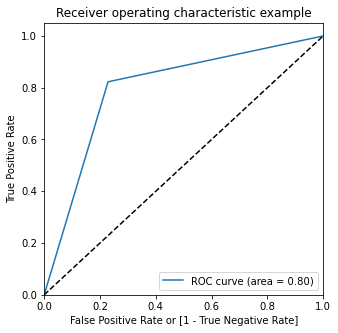

In [79]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_pred'])

#### `Finding optimal cutoff point`

In [80]:
# Let's create columns with different probability cutoffs 

numbers = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_prob,ID,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.821159,81513,1,1,1,1,1,1,1,1,1,1,0
1,0,0.063391,20009,0,1,0,0,0,0,0,0,0,0,0
2,0,0.683780,11115,1,1,1,1,1,1,1,1,0,0,0
3,0,0.144905,38429,0,1,1,0,0,0,0,0,0,0,0
4,0,0.289291,30435,0,1,1,1,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081476  1.000000  0.000000
0.1   0.1  0.330143  0.974868  0.272953
0.2   0.2  0.488143  0.941555  0.447924
0.3   0.3  0.606619  0.904150  0.580227
0.4   0.4  0.700048  0.870251  0.684950
0.5   0.5  0.775333  0.822911  0.771113
0.6   0.6  0.841857  0.763881  0.848774
0.7   0.7  0.883857  0.651666  0.904453
0.8   0.8  0.909667  0.433665  0.951890
0.9   0.9  0.919286  0.117475  0.990409


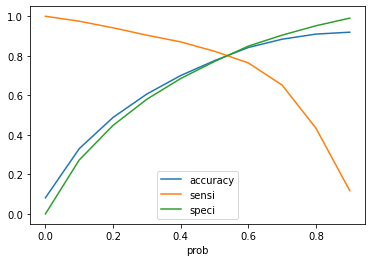

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**`From the curve above, 0.5 seems to be the optimum cutoff probability.`**

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final['churn_prob'].map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,churn,churn_prob,ID,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.821159,81513,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.063391,20009,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.683780,11115,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.144905,38429,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.289291,30435,0,1,1,1,0,0,0,0,0,0,0,0


#### `Accuracy of Train Data`

In [84]:
# Let's check the overall accuracy.

train_accuracy = metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['final_predicted'])
print('Accuracy on Train set at Optimum Cut Off : ', round(100*train_accuracy,2),'%')

Accuracy on Train set at Optimum Cut Off :  77.53 %


#### Confusion Matrix for Train Data at Optimal Cut-Off

In [85]:
# Confusion Matrix for the train set at the Optimum Cut-Off

confusion2 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['final_predicted'])
confusion2

array([[14874,  4415],
       [  303,  1408]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
train_sensitivity = TP/(FN + TP)
train_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Train Sensitivity : ', round(100*train_sensitivity,2),'%')
print('Train Specificity : ',  round(100*train_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Train Sensitivity :  82.29 %
Train Specificity :  77.11 %
False Positive Rate :  22.89 %
Positive Predictive Power :  24.18 %
Negative Predictive Power :  98.0 %


#### `ROC Curve for Cut-Off Probability at 0.5`

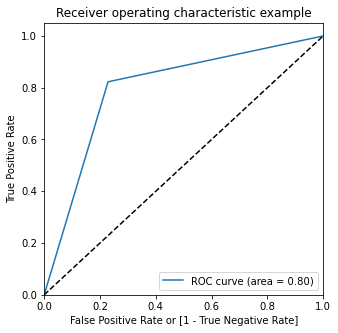

In [87]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['final_predicted'])

In [88]:
AUC = roc_auc_score(y_train_pred_final['churn'], y_train_pred_final['final_predicted'])
AUC

0.7970118241170877

#### `Prediction on Test Data`

In [89]:
# Final Features

Final_cols = X_train_1_.columns.values  
len(Final_cols)

43

In [90]:
X_test_lr = X_test_lr[Final_cols]

In [91]:
y_test_pred = lr.predict_proba(X_test_lr)

y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred[:,1]})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

,churn,churn_prob,ID
0,0,0.000214,23121
1,0,0.584543,72210
2,0,0.220866,36944
3,1,0.414200,86856
4,0,0.134288,10466


In [92]:
# Making predictions with optimal cut off = 0.5

y_test_pred_final['final_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [93]:
y_test_pred_final.head()

,churn,churn_prob,ID,final_predicted
0,0,0.000214,23121,0
1,0,0.584543,72210,1
2,0,0.220866,36944,0
3,1,0.414200,86856,0
4,0,0.134288,10466,0


#### `Accuracy of the test data`

In [94]:
test_accuracy = metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['final_predicted'])
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  77.68 %


#### `Confusion Matrix for Test Data`

In [95]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['final_predicted'])
print(confusion_test)

[[6380 1891]
 [ 118  612]]


In [96]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
test_sensitivity = TP/(FN + TP)
test_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*test_sensitivity,2),'%')
print('Specificity : ',  round(100*test_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')


Sensitivity :  83.84 %
Specificity :  77.14 %
False Positive Rate :  22.86 %
Positive Predictive Power :  24.45 %
Negative Predictive Power :  98.18 %


#### `Plotting ROC Curve`

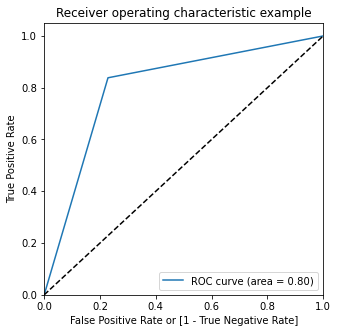

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final['churn'], y_test_pred_final['final_predicted'], drop_intermediate = False )

draw_roc(y_test_pred_final['churn'], y_test_pred_final['final_predicted'])

#### `Recall`

In [98]:
recall = recall_score(y_test_pred_final['churn'], y_test_pred_final['final_predicted'])
recall

0.8383561643835616

In [99]:
coefficients_LR = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients_LR.columns = ['Features', 'Coefficients']
coefficients_LR.sort_values(by="Coefficients", ascending=False)

,Features,Coefficients
35,max_rech_data_8,0.654606
18,loc_ic_t2t_mou_8,0.534694
13,std_og_mou_8,0.501917
23,std_ic_t2m_mou_8,0.354047
15,spl_og_mou_8,0.303293
19,loc_ic_t2m_mou_8,0.293112
16,og_others_8,0.267867
36,count_rech_2g_8,0.252554
20,loc_ic_t2f_mou_8,0.126408
17,total_og_mou_8,0.073354


In [100]:
results = pd.DataFrame({'Model':['Logistic Regression'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity], 'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})
results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]
results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356


The top 5 features affecting positively the probability of a customer getting churned :-  

- max_rech_data_8
- loc_ic_t2t_mou_8
- std_og_mou_8
- std_ic_t2m_mou_8
- spl_og_mou_8

The top 5 features affecting negatively the probability of a customer getting churned :-

- arpu_2g_8
- total_rech_num_8
- max_rech_amt_8
- total_rech_amt_8
- loc_og_t2t_mou_8

## `PCA - Principle Component Analysis`

In [101]:
X_train.shape

(21000, 143)

In [102]:
pca = PCA(random_state=100)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
# Components from PCA

pca.components_

array([[-1.37442219e-01, -1.57913699e-01, -1.83810947e-01, ...,
         4.15831129e-05,  4.82675851e-05,  3.07675929e-05],
       [ 1.65671303e-01,  3.50519853e-03,  6.57741970e-02, ...,
         9.46888162e-05,  1.06216016e-04,  6.61531467e-05],
       [ 1.30935356e-01,  1.50794018e-01,  8.91460810e-02, ...,
         8.87251734e-05,  8.51271636e-05,  4.90254934e-05],
       ...,
       [-0.00000000e+00,  4.32907592e-16,  3.84103513e-16, ...,
        -3.09811523e-01, -3.26117393e-01, -3.75035002e-01],
       [ 0.00000000e+00, -3.29158615e-16, -2.24826505e-16, ...,
         6.35587323e-02,  6.69039287e-02,  7.69395180e-02],
       [-0.00000000e+00, -2.56887717e-17, -2.01350204e-17, ...,
         1.44267929e-04,  1.51860977e-04,  1.74640124e-04]])

In [104]:
# Explained Variance Ratio for each component

pca.explained_variance_ratio_

array([1.24184180e-01, 1.11093519e-01, 7.59587044e-02, 6.14321639e-02,
       4.54270132e-02, 3.55439279e-02, 3.06457083e-02, 2.77825191e-02,
       2.60806447e-02, 2.58709877e-02, 2.39189490e-02, 2.32566338e-02,
       2.20159221e-02, 2.09687176e-02, 1.96908258e-02, 1.88075790e-02,
       1.67364339e-02, 1.55727813e-02, 1.53138371e-02, 1.42989334e-02,
       1.30776907e-02, 1.21534056e-02, 1.21278744e-02, 1.16828549e-02,
       1.05085412e-02, 9.88929393e-03, 9.57148409e-03, 9.27504871e-03,
       9.16179717e-03, 8.70265641e-03, 8.09921971e-03, 7.88846228e-03,
       7.30694908e-03, 7.07613481e-03, 6.40736981e-03, 6.23293554e-03,
       6.04922017e-03, 5.35254588e-03, 5.21389711e-03, 4.76183252e-03,
       4.73949338e-03, 4.56754454e-03, 4.11851433e-03, 4.05896827e-03,
       3.49455710e-03, 3.29655725e-03, 2.89291775e-03, 2.87411073e-03,
       2.67523356e-03, 2.60689096e-03, 2.51399944e-03, 2.37756676e-03,
       2.32141214e-03, 2.29457250e-03, 2.23126529e-03, 1.96084793e-03,
      

In [105]:
# explained variance ratio

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)* 100))

0       12.42
1       23.53
2       31.12
3       37.27
4       41.81
5       45.36
6       48.43
7       51.21
8       53.81
9       56.40
10      58.79
11      61.12
12      63.32
13      65.42
14      67.39
15      69.27
16      70.94
17      72.50
18      74.03
19      75.46
20      76.77
21      77.98
22      79.20
23      80.36
24      81.42
25      82.40
26      83.36
27      84.29
28      85.20
29      86.08
30      86.88
31      87.67
32      88.40
33      89.11
34      89.75
35      90.38
36      90.98
37      91.52
38      92.04
39      92.51
40      92.99
41      93.44
42      93.86
43      94.26
44      94.61
45      94.94
46      95.23
47      95.52
48      95.79
49      96.05
50      96.30
51      96.54
52      96.77
53      97.00
54      97.22
55      97.42
56      97.60
57      97.79
58      97.96
59      98.13
60      98.29
61      98.44
62      98.57
63      98.68
64      98.79
65      98.89
66      98.99
67      99.07
68      99.16
69      99.24
70      99.32
71    

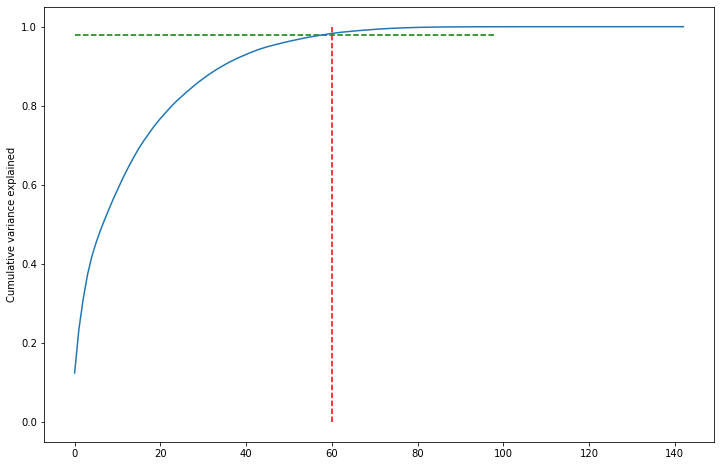

In [106]:
# Scree-Plot for the Explained Ratio

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=98, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### <font color='red'> __Observation :__ </font>

`It is observed that 98% variance are explained by 60 features.`

In [107]:
# Performing PCA with 60 components

pca_final = IncrementalPCA(n_components=60)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 60)

In [108]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(60, 60)

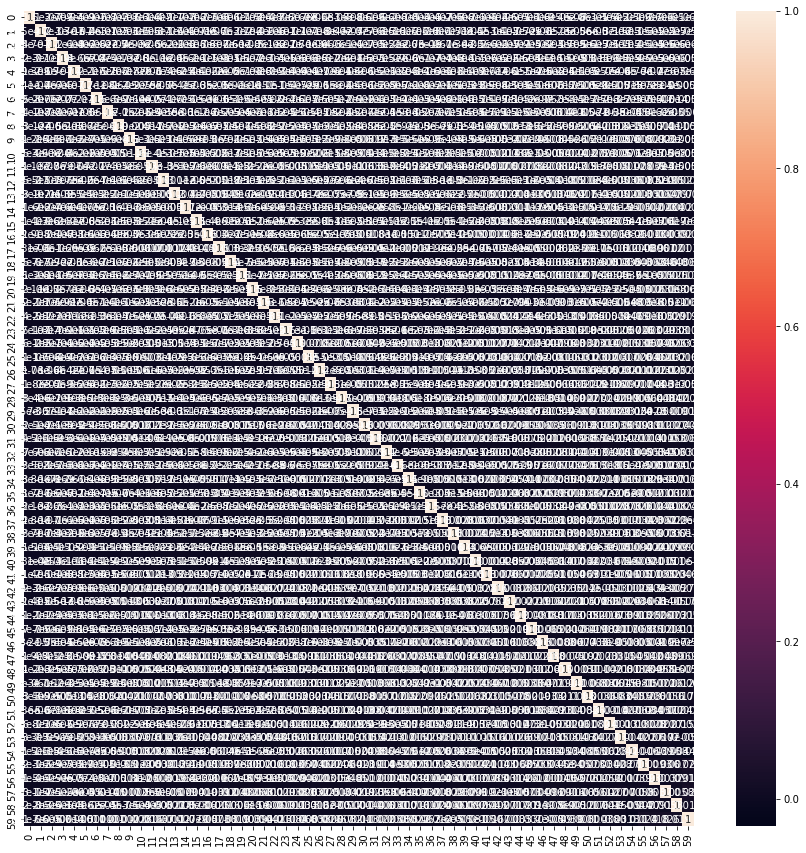

In [109]:
# Plotting the heatmap of the corr matrix

plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [110]:
# Applying the transformation on the test set

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

### `Model 2 : Logictic Regression using PCA`

In [111]:
# Applying the PCA tranffomed data to the Logistic Model

learner_pca = LogisticRegression(class_weight= 'balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)

In [112]:
# Predicting on the train set

y_train_pred_pca = model_pca.predict(df_train_pca)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred_pca)
print('Accuracy on Test Data : ', round(100*train_accuracy,2),'%')


Accuracy on Test Data :  80.1 %


In [113]:
# Predicting on the test set

y_test_pred_pca = model_pca.predict(df_test_pca)

In [114]:
y_test_pred_final_pca = pd.DataFrame({'churn':y_test, 'churn_pred':y_test_pred_pca, 'ID':y_test.index})
y_test_pred_final_pca.head()

,churn,churn_pred,ID
23121,0,0,23121
72210,0,0,72210
36944,0,0,36944
86856,1,1,86856
10466,0,0,10466


#### `Accuracy for Test Data`

In [115]:
test_accuracy = metrics.accuracy_score(y_test_pred_final_pca['churn'], y_test_pred_final_pca['churn_pred'])
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  79.9 %


#### `Confusion Matrix for Test Data`

In [116]:
confusion_pca = metrics.confusion_matrix(y_test_pred_final_pca['churn'], y_test_pred_final_pca['churn_pred'])
print(confusion_pca)

[[6580 1691]
 [ 118  612]]


In [117]:
TP = confusion_pca[1,1] # true positive 
TN = confusion_pca[0,0] # true negatives
FP = confusion_pca[0,1] # false positives
FN = confusion_pca[1,0] # false negatives
test_sensitivity = TP/(FN + TP)
test_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*test_sensitivity,2),'%')
print('Specificity : ',  round(100*test_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  83.84 %
Specificity :  79.56 %
False Positive Rate :  20.44 %
Positive Predictive Power :  26.57 %
Negative Predictive Power :  98.24 %


#### `ROC Curve`

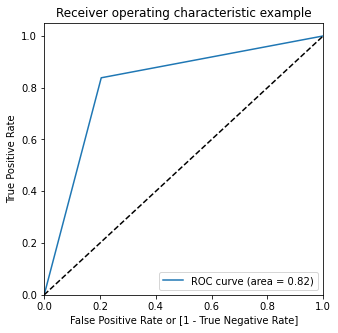

In [118]:
draw_roc(y_test_pred_final_pca['churn'], y_test_pred_final_pca['churn_pred'])

In [119]:
AUC = roc_auc_score(y_test_pred_final_pca['churn'], y_test_pred_final_pca['churn_pred'])
AUC

0.8169534418822656

In [120]:
recall = recall_score(y_test_pred_final_pca['churn'], y_test_pred_final_pca['churn_pred'])
recall

0.8383561643835616

In [121]:
tempResults = pd.DataFrame({'Model':['PCA with Logistic Regression'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity],'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})

results = pd.concat([results, tempResults])

results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]

results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356
0,PCA with Logistic Regression,0.800952,0.822911,0.816953,0.799022,0.838356,0.838356


### `Model 3 : Decision Tree using PCA`

In [122]:
# Applying PCA transformed data

dt_base = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight= 'balanced')
dt_base.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [123]:
# Predicting with Train and Test sets

y_train_pred_dt = dt_base.predict(df_train_pca)
y_test_pred_dt = dt_base.predict(df_test_pca)

In [124]:
confusion_dt = metrics.confusion_matrix(y_train, y_train_pred_dt)

TP = confusion_dt[1,1] # true positive 
TN = confusion_dt[0,0] # true negatives
FP = confusion_dt[0,1] # false positives
FN = confusion_dt[1,0] # false negatives
train_sensitivity = TP/(FN + TP)
train_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*train_sensitivity,2),'%')
print('Specificity : ',  round(100*train_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  80.07 %
Specificity :  79.77 %
False Positive Rate :  20.23 %
Positive Predictive Power :  25.98 %
Negative Predictive Power :  97.83 %


In [125]:
# Accuracy on Train Data

train_accuracy = metrics.accuracy_score(y_train, y_train_pred_dt)
print('Accuracy on Test Data : ', round(100*train_accuracy,2),'%')

Accuracy on Test Data :  79.79 %


In [126]:
confusion_dt = metrics.confusion_matrix(y_test, y_test_pred_dt)

TP = confusion_dt[1,1] # true positive 
TN = confusion_dt[0,0] # true negatives
FP = confusion_dt[0,1] # false positives
FN = confusion_dt[1,0] # false negatives
test_sensitivity = TP/(FN + TP)
test_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*test_sensitivity,2),'%')
print('Specificity : ',  round(100*test_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  75.21 %
Specificity :  79.31 %
False Positive Rate :  20.69 %
Positive Predictive Power :  24.29 %
Negative Predictive Power :  97.31 %


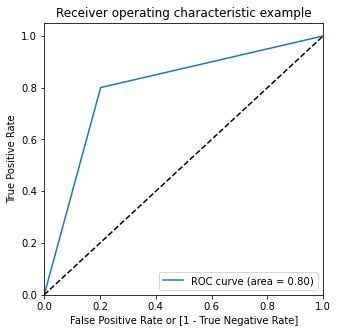

In [127]:
draw_roc(y_train, y_train_pred_dt)

In [128]:
AUC = roc_auc_score(y_train, y_train_pred_dt)
AUC

0.7991790198845401

In [129]:
# Accuracy on Test Data

test_accuracy = metrics.accuracy_score(y_test, y_test_pred_dt)
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  78.98 %


In [130]:
recall = recall_score(y_test, y_test_pred_dt)
recall

0.7520547945205479

In [131]:
tempResults = pd.DataFrame({'Model':['PCA with DT - Without Tuning HyperParameters'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity],'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})

results = pd.concat([results, tempResults])

results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]

results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356
0,PCA with Logistic Regression,0.800952,0.822911,0.816953,0.799022,0.838356,0.838356
0,PCA with DT - Without Tuning HyperParameters,0.797905,0.800701,0.799179,0.789801,0.752055,0.752055


#### Hyper-parameter tuning for the Decision Tree

In [132]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
}


# instantiate the model
dt_hyper = DecisionTreeClassifier(class_weight='balanced',random_state=100)
grid_search_dt = GridSearchCV(dt_hyper, params, cv=4, n_jobs=-1, scoring="recall",return_train_score=True,verbose=1)
grid_search_dt.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max

In [133]:
# grid search results

grid_search_dt.best_score_

0.7720704108209854

In [134]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [135]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [136]:
y_train_pred_dt_best = dt_best.predict(df_train_pca)
y_test_pred_dt_best = dt_best.predict(df_test_pca)

In [137]:
# Accuracy on Train Data

train_accuracy = metrics.accuracy_score(y_train, y_train_pred_dt_best)
print('Accuracy on Test Data : ', round(100*train_accuracy,2),'%')

Accuracy on Test Data :  78.08 %


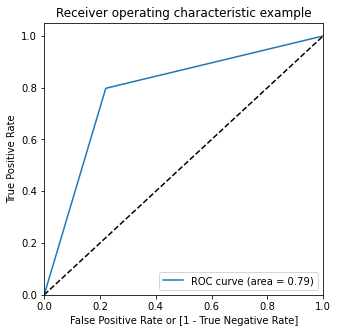

In [138]:
draw_roc(y_train, y_train_pred_dt_best)

In [139]:
AUC = roc_auc_score(y_train, y_train_pred_dt_best)
AUC

0.7885416716219523

In [140]:
# Accuracy on Test Data

test_accuracy = metrics.accuracy_score(y_test, y_test_pred_dt_best)
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  77.49 %


In [141]:
confusion_dt = metrics.confusion_matrix(y_test, y_test_pred_dt_best)

TP = confusion_dt[1,1] # true positive 
TN = confusion_dt[0,0] # true negatives
FP = confusion_dt[0,1] # false positives
FN = confusion_dt[1,0] # false negatives
test_sensitivity = TP/(FN + TP)
test_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*test_sensitivity,2),'%')
print('Specificity : ',  round(100*test_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  76.3 %
Specificity :  77.6 %
False Positive Rate :  22.4 %
Positive Predictive Power :  23.11 %
Negative Predictive Power :  97.38 %


In [142]:
recall = recall_score(y_test, y_test_pred_dt_best)
recall

0.763013698630137

In [143]:
tempResults = pd.DataFrame({'Model':['PCA with DT - With HyperParameters Tuning'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity],'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})

results = pd.concat([results, tempResults])

results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]

results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356
0,PCA with Logistic Regression,0.800952,0.822911,0.816953,0.799022,0.838356,0.838356
0,PCA with DT - Without Tuning HyperParameters,0.797905,0.800701,0.799179,0.789801,0.752055,0.752055
0,PCA with DT - With HyperParameters Tuning,0.780810,0.800701,0.788542,0.774914,0.763014,0.763014


### `Model 4 : Random Forest`

In [144]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True,
                            class_weight= 'balanced')
rf.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [145]:
y_train_pred_rf = rf.predict(df_train_pca)
y_test_pred_rf = rf.predict(df_test_pca)

In [146]:
# Accuracy on Train Data

train_accuracy = metrics.accuracy_score(y_train, y_train_pred_rf)
print('Accuracy on Train Data : ', round(100*train_accuracy,2),'%')

Accuracy on Train Data :  82.71 %


In [147]:
# Accuracy on Test Data

test_accuracy = metrics.accuracy_score(y_test, y_test_pred_rf)
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  81.82 %


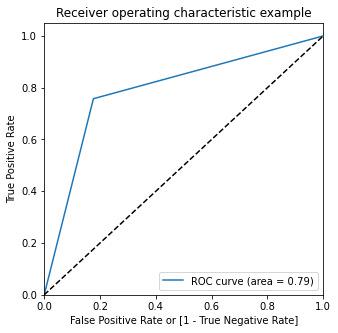

In [148]:
draw_roc(y_test, y_test_pred_rf)

In [149]:
AUC = roc_auc_score(y_test, y_test_pred_rf)
AUC

0.7905673892772735

In [150]:
recall = recall_score(y_test, y_test_pred_rf)
recall

0.7575342465753425

In [151]:
tempResults = pd.DataFrame({'Model':['PCA with RF - Without HyperParameters Tuning'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity],'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})

results = pd.concat([results, tempResults])

results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]

results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356
0,PCA with Logistic Regression,0.800952,0.822911,0.816953,0.799022,0.838356,0.838356
0,PCA with DT - Without Tuning HyperParameters,0.797905,0.800701,0.799179,0.789801,0.752055,0.752055
0,PCA with DT - With HyperParameters Tuning,0.780810,0.800701,0.788542,0.774914,0.763014,0.763014
0,PCA with RF - Without HyperParameters Tuning,0.827143,0.800701,0.790567,0.818242,0.763014,0.757534


#### `Hyper-parameter tuning for the Random Forest`

In [152]:
rf_best = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight= 'balanced')

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search_rf = GridSearchCV(estimator=rf_best,
                           param_grid=params,
                           cv = 4, return_train_score=True,
                           n_jobs=-1, verbose=1, scoring="recall")

grid_search_rf.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 18.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=100,
                             

In [153]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [154]:
y_train_pred_rf_best = rf_best.predict(df_train_pca)
y_test_pred_rf_best = rf_best.predict(df_test_pca)

In [155]:
# Accuracy on Train Data

train_accuracy = metrics.accuracy_score(y_train, y_train_pred_rf_best)
print('Accuracy on Train Data : ', round(100*train_accuracy,2),'%')

Accuracy on Train Data :  82.6 %


In [156]:
confusion_rf = metrics.confusion_matrix(y_train, y_train_pred_rf_best)

TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
train_sensitivity = TP/(FN + TP)
train_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*train_sensitivity,2),'%')
print('Specificity : ',  round(100*train_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  77.56 %
Specificity :  83.05 %
False Positive Rate :  16.95 %
Positive Predictive Power :  28.87 %
Negative Predictive Power :  97.66 %


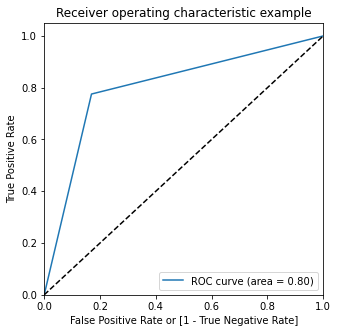

In [157]:
draw_roc(y_train, y_train_pred_rf_best)

In [158]:
# Accuracy on Test Data

test_accuracy = metrics.accuracy_score(y_test, y_test_pred_rf_best)
print('Accuracy on Test Data : ', round(100*test_accuracy,2),'%')

Accuracy on Test Data :  81.81 %


In [159]:
confusion_rf = metrics.confusion_matrix(y_test, y_test_pred_rf_best)

TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
test_sensitivity = TP/(FN + TP)
test_specificity = TN/(FP + TN)
falsepositiverate = FP/(FP + TN)
positivepredictivevalue = TP/(TP +FP )
negativepredictivevalue = TN/(TN + FN)
print('Sensitivity : ', round(100*test_sensitivity,2),'%')
print('Specificity : ',  round(100*test_specificity,2),'%')
print('False Positive Rate : ',  round(100*falsepositiverate,2),'%')
print('Positive Predictive Power : ',  round(100*positivepredictivevalue,2),'%')
print('Negative Predictive Power : ',  round(100*negativepredictivevalue,2),'%')

Sensitivity :  76.44 %
Specificity :  82.29 %
False Positive Rate :  17.71 %
Positive Predictive Power :  27.58 %
Negative Predictive Power :  97.54 %


In [160]:
AUC = roc_auc_score(y_test, y_test_pred_rf_best)
recall = recall_score(y_test, y_test_pred_rf_best)

In [161]:
tempResults = pd.DataFrame({'Model':['PCA with RF - With HyperParameters Tuning'], 'Train Accuracy': [train_accuracy], 
                        'Train Sensitivity': [train_sensitivity],'AUC':[AUC],
                       'Test Accuracy': [test_accuracy], 'Test Sensitivity': [test_sensitivity], 
                        'Recall':[recall]})

results = pd.concat([results, tempResults])

results = results[['Model', 'Train Accuracy', 'Train Sensitivity','AUC',
                   'Test Accuracy','Test Sensitivity','Recall']]

results

,Model,Train Accuracy,Train Sensitivity,AUC,Test Accuracy,Test Sensitivity,Recall
0,Logistic Regression,0.775333,0.822911,0.797012,0.776803,0.838356,0.838356
0,PCA with Logistic Regression,0.800952,0.822911,0.816953,0.799022,0.838356,0.838356
0,PCA with DT - Without Tuning HyperParameters,0.797905,0.800701,0.799179,0.789801,0.752055,0.752055
0,PCA with DT - With HyperParameters Tuning,0.780810,0.800701,0.788542,0.774914,0.763014,0.763014
0,PCA with RF - Without HyperParameters Tuning,0.827143,0.800701,0.790567,0.818242,0.763014,0.757534
0,PCA with RF - With HyperParameters Tuning,0.826000,0.775570,0.793629,0.818131,0.764384,0.764384


### **`Summary`**

`Sensitivity is the primary metric we need to consider to select the best model, since it reflects the probability of predicting the actual churned customers correctly.
Logistic Regression Model (with RFE) and Logistic Regression with PCA model, though both have the same sensitivity values, yet the accuracy and AUC score of the latter is much better.
Hence, Logistic Regression with PCA seems to be the best model.

From the most interpretable model (Logistic Regression), we can conclude the followings:-


The top 5 features affecting positively the probability of a customer getting churned :-  

- max_rech_data_8
- loc_ic_t2t_mou_8
- std_og_mou_8
- std_ic_t2m_mou_8
- spl_og_mou_8

The top 5 features affecting negatively the probability of a customer getting churned :-

- arpu_2g_8
- total_rech_num_8
- max_rech_amt_8
- total_rech_amt_8
- loc_og_t2t_mou_8

Based on the above results, the major factors that determine if a subscriber is going to churn is the minutes of usage for the month of August(action phase) for the outgoing and incoming calls (Local/STD), both within the same or different operators.

From EDA, it is also observed that, not only in the action phase, during the good phase, too, it can be predicted a probable would-be churned customer, based on the minutes of usage of incoming and outgoing calls(Local/STD).

Moreover, it is also observed that the customers who are on the same network for less than a year, are more likely to churn.


### `Recommendations`

    - Special care should be taken to those customers and telecom operators should reach out to them, if any customer is found to be using very less minutes for incoming and outgoing calls (Local/STD).
    - Telecom company should encourage the customers to opt for services of Facebook and other similar social networking sites, in order to curb churning.
    - Telecom company is required to pay special attention to those customers who are less than a year or year-and-half on the same operator, to restrict possible future churning.
    - Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
    - The company needs to focus on the ISD and STD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
    - To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.